In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import xgboost as xgb

In [3]:
df = pd.read_csv('PJME_hourly.csv')

In [8]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [6]:
df.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [7]:
df.dtypes

Datetime     object
PJME_MW     float64
dtype: object

In [9]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

In [10]:
df.dtypes

Datetime    datetime64[ns]
PJME_MW            float64
dtype: object

In [11]:
df = df.set_index('Datetime')

In [12]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


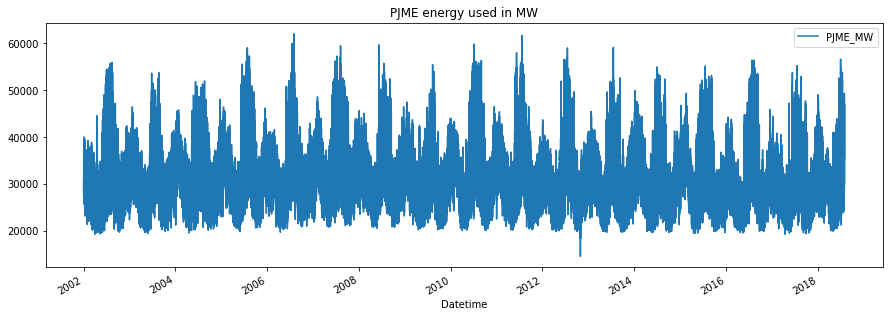

In [13]:
df.plot(figsize=(15,5),title = 'PJME energy used in MW')
plt.show()

In [14]:
train = df.loc[df.index <'01-01-2015']
test = df.loc[df.index >= '01-01-2015']

In [15]:
train

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0
...,...
2014-01-01 20:00:00,36193.0
2014-01-01 21:00:00,35601.0
2014-01-01 22:00:00,34242.0


In [16]:
test

,PJME_MW
Datetime,
2015-01-01 00:00:00,32802.0
2015-12-31 01:00:00,24305.0
2015-12-31 02:00:00,23156.0
2015-12-31 03:00:00,22514.0
2015-12-31 04:00:00,22330.0
...,...
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0


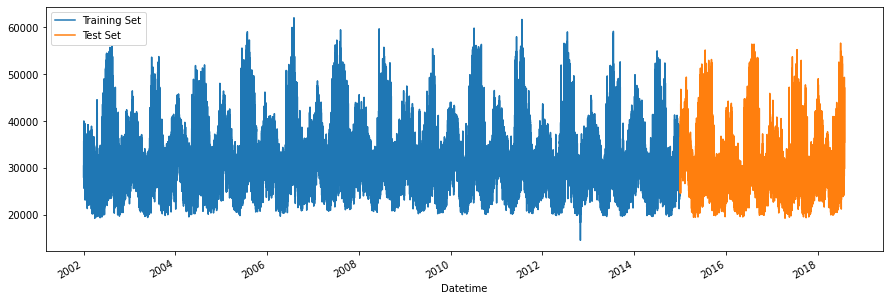

In [18]:
fig,ax = plt.subplots(figsize=(15,5))
train.plot(ax=ax , label='Training Data')
test.plot(ax=ax , label='Test Data')
ax.legend(['Training Set','Test Set'])
plt.show()

In [19]:
aug_frst_wk = df.loc[(df.index>'08-01-2010') & (df.index <'08-08-2010')]

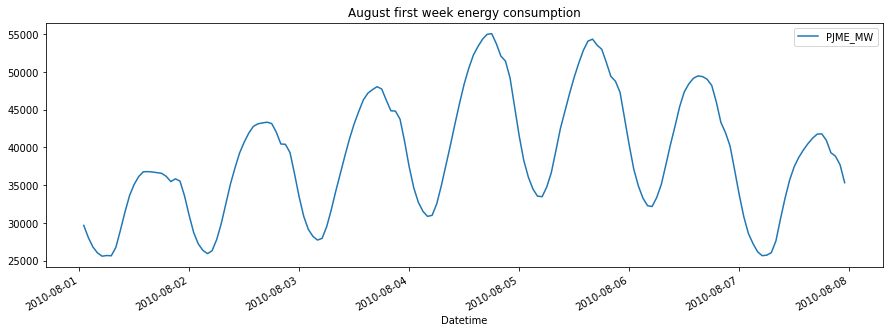

In [20]:
aug_frst_wk.plot(figsize=(15,5),title = 'August first week energy consumption')
plt.show()

In [21]:
def create_feature(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day_of_week
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['day_of_year'] = df.index.day_of_year
    return df

In [22]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [24]:
df = create_feature(df)
df.head(24)

,PJME_MW,hour,day,quarter,month,year,day_of_year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
2002-12-31 06:00:00,26222.0,6,1,4,12,2002,365
2002-12-31 07:00:00,28702.0,7,1,4,12,2002,365
2002-12-31 08:00:00,30698.0,8,1,4,12,2002,365
2002-12-31 09:00:00,31800.0,9,1,4,12,2002,365


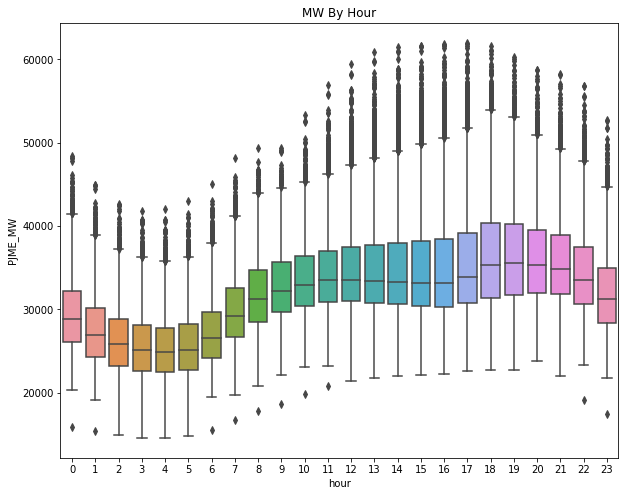

In [25]:
# Hourly
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df , x = 'hour',y='PJME_MW')
ax.set_title('MW By Hour')
plt.show()

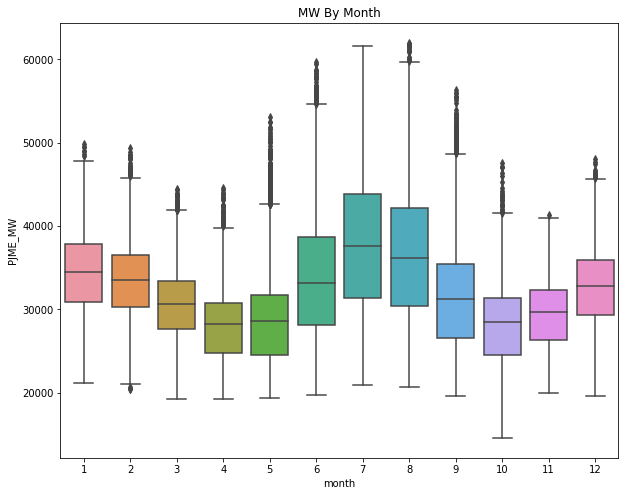

In [26]:
# Monthly
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df , x = 'month',y='PJME_MW')
ax.set_title('MW By Month')
plt.show()

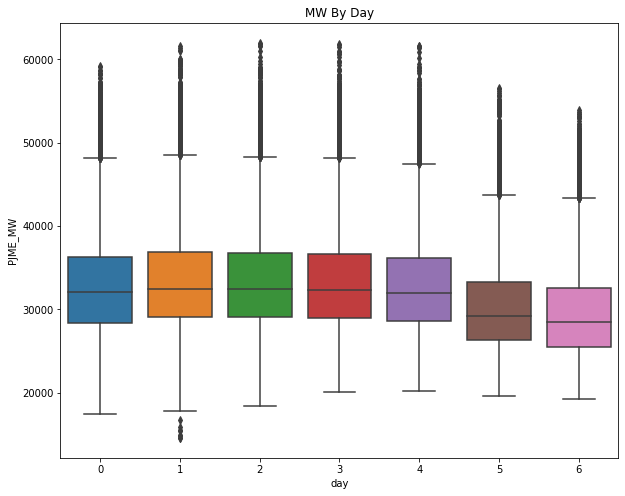

In [27]:
# Daily
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df , x = 'day',y='PJME_MW')
ax.set_title('MW By Day')
plt.show()

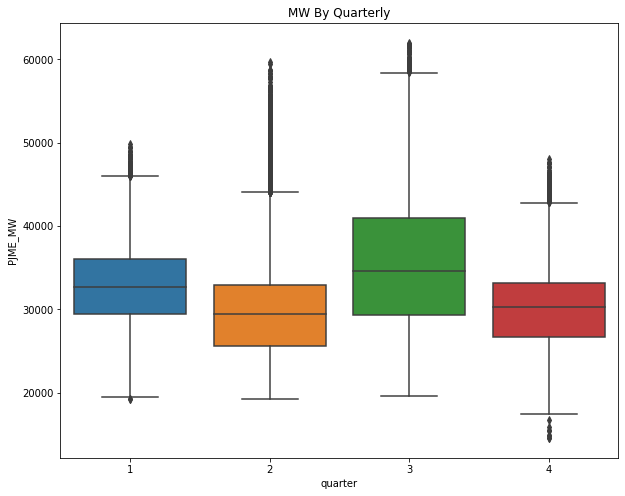

In [28]:
# Quarterly
fig,ax = plt.subplots(figsize=(10,8))
sns.boxplot(data = df , x = 'quarter',y='PJME_MW')
ax.set_title('MW By Quarterly')
plt.show()

In [29]:
train = create_feature(train)
test = create_feature(test)

C:\Users\sengu\AppData\Local\Temp\ipykernel_8284\1502814093.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\sengu\AppData\Local\Temp\ipykernel_8284\1502814093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day'] = df.index.day_of_week
C:\Users\sengu\AppData\Local\Temp\ipykernel_8284\1502814093.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [30]:
train

,PJME_MW,hour,day,quarter,month,year,day_of_year
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2014-01-01 20:00:00,36193.0,20,2,1,1,2014,1
2014-01-01 21:00:00,35601.0,21,2,1,1,2014,1
2014-01-01 22:00:00,34242.0,22,2,1,1,2014,1


In [31]:
test

,PJME_MW,hour,day,quarter,month,year,day_of_year
Datetime,,,,,,,
2015-01-01 00:00:00,32802.0,0,3,1,1,2015,1
2015-12-31 01:00:00,24305.0,1,3,4,12,2015,365
2015-12-31 02:00:00,23156.0,2,3,4,12,2015,365
2015-12-31 03:00:00,22514.0,3,3,4,12,2015,365
2015-12-31 04:00:00,22330.0,4,3,4,12,2015,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


In [32]:
features = ['hour','day','quarter','month','year','day_of_year']
target = ['PJME_MW']

In [33]:
xtrain = train[features]
ytrain = train[target]
xtest = test[features]
ytest = test[target]

In [34]:
reg = xgb.XGBRegressor(n_estimators = 1000)
model = reg.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.5184036159428973

In [37]:
reg = xgb.XGBRegressor(n_estimators = 1000,early_stopping_rounds = 60)
model = reg.fit(xtrain,ytrain,eval_set = [(xtrain,ytrain),(xtest,ytest)])
model.score(xtest,ytest)

[0]	validation_0-rmse:23192.08347	validation_1-rmse:22262.72116
[1]	validation_0-rmse:16420.93235	validation_1-rmse:15523.28748
[2]	validation_0-rmse:11738.22738	validation_1-rmse:10902.11140
[3]	validation_0-rmse:8540.54141	validation_1-rmse:7809.80731
[4]	validation_0-rmse:6406.33278	validation_1-rmse:5886.97003
[5]	validation_0-rmse:5020.18414	validation_1-rmse:4712.54530
[6]	validation_0-rmse:4115.48568	validation_1-rmse:4193.11193
[7]	validation_0-rmse:3582.20742	validation_1-rmse:3953.68877
[8]	validation_0-rmse:3261.69940	validation_1-rmse:3796.80086
[9]	validation_0-rmse:3081.02460	validation_1-rmse:3777.59061
[10]	validation_0-rmse:2982.98557	validation_1-rmse:3763.35259
[11]	validation_0-rmse:2888.50281	validation_1-rmse:3809.64469
[12]	validation_0-rmse:2840.45869	validation_1-rmse:3810.92832
[13]	validation_0-rmse:2794.92469	validation_1-rmse:3833.23047
[14]	validation_0-rmse:2768.03577	validation_1-rmse:3826.84933
[15]	validation_0-rmse:2747.60912	validation_1-rmse:3839.80

0.6595365615571771

In [42]:
reg = xgb.XGBRegressor(n_estimators = 1000,early_stopping_rounds = 60,learning_rate = 0.01)
model = reg.fit(xtrain,ytrain,eval_set = [(xtrain,ytrain),(xtest,ytest)])
model.score(xtest,ytest)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[1]	validation_0-rmse:32279.88735	validation_1-rmse:31332.60350
[2]	validation_0-rmse:31961.14360	validation_1-rmse:31014.27357
[3]	validation_0-rmse:31645.62525	validation_1-rmse:30699.10021
[4]	validation_0-rmse:31333.30788	validation_1-rmse:30385.92606
[5]	validation_0-rmse:31024.14316	validation_1-rmse:30075.82644
[6]	validation_0-rmse:30718.10796	validation_1-rmse:29769.05547
[7]	validation_0-rmse:30415.17979	validation_1-rmse:29465.13991
[8]	validation_0-rmse:30115.31200	validation_1-rmse:29164.62813
[9]	validation_0-rmse:29818.48171	validation_1-rmse:28866.85195
[10]	validation_0-rmse:29524.66621	validation_1-rmse:28571.74321
[11]	validation_0-rmse:29233.82326	validation_1-rmse:28280.36822
[12]	validation_0-rmse:28945.84624	validation_1-rmse:27991.28725
[13]	validation_0-rmse:28660.79477	validation_1-rmse:27705.25177
[14]	validation_0-rmse:28378.63482	validation_1-rmse:27422.93837
[15]	validation_0-rmse:28099.33236	

0.6680627119684713